In [2]:
#from google.colab import drive
import os

# Monter Google Drive
#drive.mount('/content/drive')

# Chemin vers le dataset
dataset_path = "/home/orlane/projet_reconnaissance/data/data/TRAIN"

# Vérifier l'accès
print("Fichiers disponibles :", os.listdir(dataset_path))


Fichiers disponibles : ['Side Plank', 'Downdog', 'Warrior', 'Goddess', 'Tree', 'Plank']


In [3]:
#!pip install mediapipe opencv-python pandas tqdm
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import os
from tqdm import tqdm


In [4]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # Ajouter x, y, z

    return keypoints if keypoints else [0] * 99  # 33 keypoints * 3 coordonnées


I0000 00:00:1744214490.260614   36020 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1744214490.262777   36079 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1744214490.322992   36067 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744214490.354996   36065 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [5]:
output_csv = "/home/orlane/projet_reconnaissance/keypoints.csv"

data = []
labels = []
poses = ["Downdog", "Goddess", "Plank", "Side Plank", "Tree", "Warrior"]

for pose_name in poses:
    image_folder = os.path.join(dataset_path,  pose_name)

    for img_name in tqdm(os.listdir(image_folder), desc=f"Processing {pose_name}"):
        img_path = os.path.join(image_folder, img_name)
        keypoints = extract_keypoints(img_path)

        data.append(keypoints)
        labels.append(pose_name)

# Convertir en DataFrame et sauvegarder
df = pd.DataFrame(data)
df["label"] = labels
df.to_csv(output_csv, index=False)

print(f"Extraction terminée ! Fichier sauvegardé : {output_csv}")


Processing Warrior: 100%|██████████| 198/198 [00:08<00:00, 24.43it/s]


Extraction terminée ! Fichier sauvegardé : /home/orlane/projet_reconnaissance/keypoints.csv


In [6]:
df = pd.read_csv("/home/orlane/projet_reconnaissance/keypoints.csv")
print(df.head())  # Afficher les premières lignes
print(df.shape)   # Vérifier la taille du DataFrame


          0         1         2         3         4         5         6  \
0  0.533731  0.685811 -0.029059  0.547698  0.703667 -0.014572  0.549056   
1  0.389433  0.738541 -0.063731  0.366814  0.745103 -0.112014  0.365048   
2  0.477259  0.656966 -0.016868  0.459817  0.667675 -0.052024  0.457631   
3  0.609448  0.724027  0.060502  0.624390  0.744517  0.080969  0.626353   
4  0.591552  0.659720  0.000740  0.607983  0.666636  0.013175  0.610040   

          7         8         9  ...        90        91        92        93  \
0  0.702865 -0.014581  0.550717  ...  0.186425  0.845325 -0.021486  0.300106   
1  0.742451 -0.112005  0.363317  ...  0.969217  0.727881  0.479700  0.876047   
2  0.665665 -0.051951  0.455409  ...  0.863689  0.670443  0.303445  0.786469   
3  0.744557  0.080867  0.628896  ...  0.037380  0.804419 -0.083712  0.175579   
4  0.665381  0.013139  0.612268  ...  0.147558  0.715045  0.005823  0.263169   

         94        95        96        97        98    label  
0  0.

In [8]:
import pandas as pd

# Charger les keypoints extraits
df = pd.read_csv("/home/orlane/projet_reconnaissance/keypoints.csv")

# Afficher les 5 premières lignes pour vérifier le format
print(df.head())

# Vérifier la taille du dataset
print(f"Taille du dataset : {df.shape}")

# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum())


          0         1         2         3         4         5         6  \
0  0.533731  0.685811 -0.029059  0.547698  0.703667 -0.014572  0.549056   
1  0.389433  0.738541 -0.063731  0.366814  0.745103 -0.112014  0.365048   
2  0.477259  0.656966 -0.016868  0.459817  0.667675 -0.052024  0.457631   
3  0.609448  0.724027  0.060502  0.624390  0.744517  0.080969  0.626353   
4  0.591552  0.659720  0.000740  0.607983  0.666636  0.013175  0.610040   

          7         8         9  ...        90        91        92        93  \
0  0.702865 -0.014581  0.550717  ...  0.186425  0.845325 -0.021486  0.300106   
1  0.742451 -0.112005  0.363317  ...  0.969217  0.727881  0.479700  0.876047   
2  0.665665 -0.051951  0.455409  ...  0.863689  0.670443  0.303445  0.786469   
3  0.744557  0.080867  0.628896  ...  0.037380  0.804419 -0.083712  0.175579   
4  0.665381  0.013139  0.612268  ...  0.147558  0.715045  0.005823  0.263169   

         94        95        96        97        98    label  
0  0.

In [10]:
from sklearn.preprocessing import StandardScaler

# Supprimer les lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Séparer features (X) et labels (y)
X = df.iloc[:, :-1].values  # Toutes les colonnes sauf la dernière
y = df.iloc[:, -1].values   # La colonne des labels

# Normalisation des coordonnées des keypoints
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("✅ Données nettoyées et normalisées !")


✅ Données nettoyées et normalisées !


In [11]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Encoder les labels (ex: "Downdog" -> 0, "Goddess" -> 1, ...)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Sauvegarder l'encodeur pour l'utiliser plus tard
with open("/home/orlane/projet_reconnaissance/label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

print(f"✅ Labels encodés : {encoder.classes_}")


✅ Labels encodés : ['Downdog' 'Goddess' 'Plank' 'Side Plank' 'Tree' 'Warrior']


In [12]:
from sklearn.model_selection import train_test_split

# Diviser en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train : {X_train.shape}, Test : {X_test.shape}")


Train : (601, 99), Test : (151, 99)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

# Reshape des données pour LSTM (601, 99) → (601, 33, 3)  (33 keypoints avec (x, y, z))
X_train_reshaped = X_train.reshape((X_train.shape[0], 33, 3))
X_test_reshaped = X_test.reshape((X_test.shape[0], 33, 3))

# Définition du modèle amélioré (LSTM plus profond + MLP)
model = models.Sequential([
    # Première couche LSTM
    layers.LSTM(256, return_sequences=True, input_shape=(33, 3), kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Deuxième couche LSTM
    layers.LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Troisième couche LSTM
    layers.LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Couche dense pour classifier
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Sortie avec softmax (classification)
    layers.Dense(len(encoder.classes_), activation='softmax')
])

# Compilation du modèle
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train_reshaped, y_train,
                    epochs=200,  # Augmentation du nombre d’époques
                    batch_size=16,
                    validation_data=(X_test_reshaped, y_test))

# Sauvegarde du modèle
model.save("/content/drive/MyDrive/yoga_pose_project/yoga_pose_model_deep_lstm.h5")

print("✅ Modèle LSTM profond entraîné et sauvegardé !")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - accuracy: 0.2081 - loss: 11.2931 - val_accuracy: 0.2980 - val_loss: 10.4976
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - accuracy: 0.3249 - loss: 10.5201 - val_accuracy: 0.3775 - val_loss: 10.3740
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - accuracy: 0.3833 - loss: 10.3255 - val_accuracy: 0.3642 - val_loss: 10.2356
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.4439 - loss: 10.0888 - val_accuracy: 0.4238 - val_loss: 9.9926
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 200ms/step - accuracy: 0.4405 - loss: 9.8999 - val_accuracy: 0.4172 - val_loss: 9.7450
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.5138 - loss: 9.6573 - val_accuracy: 0.4636 - val_loss: 9.5114
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.5729 - loss: 9.3995 - val_accuracy: 0.5430 - val_loss: 9.2059
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.5113 - loss: 9.38

✅ Modèle LSTM profond entraîné et sauvegardé !


In [15]:
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Charger les données
df = pd.read_csv("/home/orlane/projet_reconnaissance/keypoints.csv")

# Séparer les keypoints (X) et labels (y)
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Labels

# Normalisation des keypoints
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encodage des labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Sauvegarde du scaler et de l'encodeur
with open("/home/orlane/projet_reconnaissance/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("/home/orlane/projet_reconnaissance/label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

print("✅ Scaler et encodeur sauvegardés avec succès !")


✅ Scaler et encodeur sauvegardés avec succès !


In [16]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle

# Charger le modèle
model = tf.keras.models.load_model("/home/orlane/projet_reconnaissance/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/home/orlane/projet_reconnaissance/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/home/orlane/projet_reconnaissance/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialisation de MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # x, y, z (normalisés)

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_pose(image_path):
    """Prédit la pose de yoga à partir d'une image"""
    keypoints = extract_keypoints(image_path)

    if keypoints:
        keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le modèle
        keypoints = scaler.transform(keypoints)  # Normalisation
        keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

        # Prédire la classe
        pred = model.predict(keypoints)
        predicted_class = encoder.inverse_transform([pred.argmax()])[0]

        print(f"🧘‍♂️ Pose prédite : {predicted_class}")
    else:
        print("❌ Impossible de détecter les keypoints.")

# 🔹 Test sur une image spécifique
image_path = "/home/orlane/projet_reconnaissance/data/data/TEST/Side Plank/00000015.jpg"
predict_pose(image_path)


I0000 00:00:1744214578.789395   36020 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1744214578.852339   36020 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1744214578.852794   36020 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1744214578.854277   36020 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
🧘‍♂️ Pose prédite : Side Plank


2025-04-09 17:03:00.323159: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


Physical devices cannot be modified after being initialized


I0000 00:00:1744214611.249941   36020 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1744214611.250859   36209 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1744214611.309979   36203 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744214611.343268   36200 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
🧘‍♂️ Pose prédite : Tree


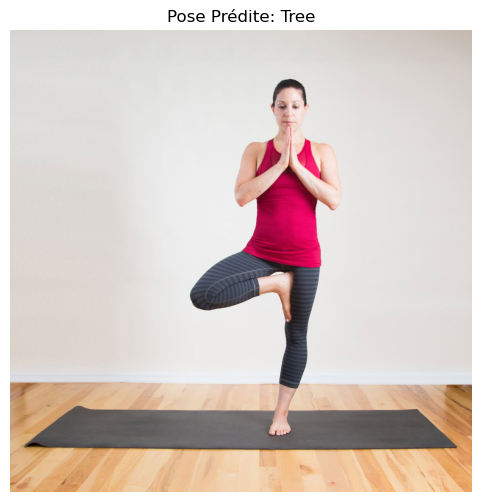

In [17]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle
import matplotlib.pyplot as plt  # Pour l'affichage dans le notebook

tf.keras.backend.clear_session()  # Libère la mémoire allouée par TensorFlow

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
# Charger le modèle
model = tf.keras.models.load_model("/home/orlane/projet_reconnaissance/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/home/orlane/projet_reconnaissance/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/home/orlane/projet_reconnaissance/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialisation de MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # x, y, z (normalisés)

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_pose(image_path):
    """Prédit la pose de yoga et affiche l'image dans le notebook"""
    keypoints = extract_keypoints(image_path)

    if keypoints:
        keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le modèle
        keypoints = scaler.transform(keypoints)  # Normalisation
        keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

        # Prédire la classe
        pred = model.predict(keypoints)
        predicted_class = encoder.inverse_transform([pred.argmax()])[0]

        print(f"🧘‍♂️ Pose prédite : {predicted_class}")

        # Afficher l'image avec la prédiction
        display_image(image_path, predicted_class)
    else:
        print("❌ Impossible de détecter les keypoints.")

def display_image(image_path, predicted_class):
    """Affiche l'image avec la pose prédite directement dans le notebook"""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Ajouter le texte sur l'image
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, predicted_class, (30, 50), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Affichage dans le notebook
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.title(f"Pose Prédite: {predicted_class}")
    plt.show()

# 🔹 Test sur une image spécifique
image_path = "/home/orlane/projet_reconnaissance/data/data/TEST/Tree/00000000.jpg"
predict_pose(image_path)


In [2]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle
import os

tf.keras.backend.clear_session()

# Configure TensorFlow pour allouer la mémoire de manière progressive
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Charger le modèle
model = tf.keras.models.load_model("/home/orlane/projet_reconnaissance/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/home/orlane/projet_reconnaissance/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/home/orlane/projet_reconnaissance/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialisation de MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # x, y, z (normalisés)

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_poses_from_folder(folder_path):
    """Prédit les poses pour toutes les images d'un dossier"""
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_files:
        print("❌ Aucun fichier image trouvé dans le dossier.")
        return

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        keypoints = extract_keypoints(image_path)

        if keypoints:
            keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le modèle
            keypoints = scaler.transform(keypoints)  # Normalisation
            keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

            # Prédire la classe
            pred = model.predict(keypoints)
            predicted_class = encoder.inverse_transform([pred.argmax()])[0]

            print(f"✅ {image_file} → Pose prédite : {predicted_class}")
        else:
            print(f"❌ {image_file} → Impossible de détecter les keypoints.")

# 🔹 Test sur un dossier contenant plusieurs images
folder_path = "/home/orlane/projet_reconnaissance/data/data/TEST/Plank"
predict_poses_from_folder(folder_path)


I0000 00:00:1744218915.829105   36639 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1744218915.831453   36774 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1744218915.888611   36771 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744218915.929076   36768 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744218915.952221   36765 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


2025-04-09 18:15:16.277211: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


✅ 00000085.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
✅ 00000039.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
✅ 00000005.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
✅ 00000016.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
✅ 00000117.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
✅ 00000091.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
✅ 00000017.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
✅ 00000074.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
✅ 00000062.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
✅ 00000029.jpg → Pose prédite : Side Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
✅ 00000052.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
✅ 00000060.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
✅ 00000093.jpg → Pose prédite : Plank
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
✅ 00000

In [4]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle
import os
import random

# Charger le modèle
model = tf.keras.models.load_model("/home/orlane/projet_reconnaissance/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/home/orlane/projet_reconnaissance/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/home/orlane/projet_reconnaissance/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialisation de MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # x, y, z (normalisés)

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_poses_from_random_folder(test_root):
    """Sélectionne un dossier aléatoire de pose et prédit les poses sur ses images"""
    pose_folders = [f for f in os.listdir(test_root) if os.path.isdir(os.path.join(test_root, f))]

    if not pose_folders:
        print("❌ Aucun dossier de pose trouvé dans le dossier TEST.")
        return

    # Choix aléatoire d'un dossier de pose
    selected_pose = random.choice(pose_folders)
    selected_folder = os.path.join(test_root, selected_pose)

    print(f"📂 Dossier sélectionné aléatoirement : {selected_pose}")

    # Liste des images dans le dossier choisi
    image_files = [f for f in os.listdir(selected_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_files:
        print("❌ Aucun fichier image trouvé dans le dossier sélectionné.")
        return

    for image_file in image_files:
        image_path = os.path.join(selected_folder, image_file)
        keypoints = extract_keypoints(image_path)

        if keypoints:
            keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le modèle
            keypoints = scaler.transform(keypoints)  # Normalisation
            keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

            # Prédire la classe
            pred = model.predict(keypoints)
            predicted_class = encoder.inverse_transform([pred.argmax()])[0]

            print(f"✅ {image_file} → Pose prédite : {predicted_class}")
        else:
            print(f"❌ {image_file} → Impossible de détecter les keypoints.")

# 🔹 Test sur un dossier choisi aléatoirement dans le dossier TEST
test_root = "/home/orlane/projet_reconnaissance/data/data/TEST"
predict_poses_from_random_folder(test_root)


I0000 00:00:1744219068.399619   36639 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1744219068.400806   37674 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1744219068.460821   37668 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744219068.493363   37668 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


📂 Dossier sélectionné aléatoirement : Goddess
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
✅ 00000085.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
✅ 00000027.jpg → Pose prédite : Goddess
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
✅ 00000086.jpg → Pose prédite : Goddess
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
✅ 00000023.jpg → Pose prédite : Goddess
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
✅ 00000039.jpg → Pose prédite : Goddess
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
✅ 00000005.jpg → Pose prédite : Goddess
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
✅ 00000016.jpg → Pose prédite : Goddess
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
✅ 00000057.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
✅ 00000089.jpg → Pose prédite : Goddess
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
✅ 00000095.jpeg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
✅ 00000091.jpg → Pose prédite : Warrior
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
✅ 00000059.jpg → Pose prédite : Goddess
1/1 ━━━━━━━━━━━━

In [5]:
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
import pickle

# Charger le modèle entraîné
model = tf.keras.models.load_model("/home/orlane/projet_reconnaissance/yoga_pose_model_lstm.h5")

# Charger le scaler et l'encodeur des labels
with open("/home/orlane/projet_reconnaissance/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("/home/orlane/projet_reconnaissance/label_encoder.pkl", "rb") as f:
    encoder = pickle.load(f)

# Initialiser MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def extract_keypoints(image_path):
    """Extrait les keypoints d'une image avec MediaPipe"""
    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Impossible de charger l'image : {image_path}")
        return None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)

    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y, landmark.z])  # Normalisé entre 0 et 1

    return keypoints if len(keypoints) == 99 else None  # 33 keypoints * (x, y, z)

def predict_pose(image_path):
    """Prédit la pose de yoga d'une image externe"""
    keypoints = extract_keypoints(image_path)

    if keypoints:
        keypoints = np.array(keypoints).reshape(1, -1)  # Mise en forme pour le modèle
        keypoints = scaler.transform(keypoints)  # Normalisation
        keypoints = keypoints.reshape(1, 33, 3)  # Adapter pour LSTM

        # Prédire la classe
        pred = model.predict(keypoints)
        predicted_class = encoder.inverse_transform([pred.argmax()])[0]

        print(f"🧘‍♂️ Pose prédite : {predicted_class}")
    else:
        print("❌ Aucune keypoint détectée. Vérifie l’image.")

# 🔹 Modifier ce chemin pour une image externe (pas dans le dataset)
image_path = "/home/orlane/projet_reconnaissance/downward-facing-dog.jpg"

# Exécuter la prédiction
predict_pose(image_path)


I0000 00:00:1744219524.666882   36639 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1744219524.668025   38642 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1744219524.730183   38634 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744219524.771782   38635 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
🧘‍♂️ Pose prédite : Downdog


In [8]:
# 📂 Modifier ici pour tester une autre image !
image_path = "/home/orlane/projet_reconnaissance/yoga poses for kids.jpeg"

predict_pose(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
🧘‍♂️ Pose prédite : Tree
